# Коломийчук Илья ИУ5-61Б Вариант 5

In [9]:
import pandas as pd

from sklearn.model_selection import train_test_split

## Загрузка и предобработка данных

In [3]:
df = pd.read_csv("./Data/heart.csv", sep=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isna().sum()

In [13]:
X, y = df.drop(columns = ['target']), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

len(X_train), len(X_test), len(y_train), len(y_test)

(820, 205, 820, 205)

Очень хороший набор данных: нет пропусков, нет необходимости в кодировании категориальных признаков, т.к. их нет.
Можно производить обучение логистической регрессии и решающего леса

## Логистическая регрессия

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', penalty='l1', max_iter=50, n_jobs=-1)

In [18]:
lr.fit(X_train, y_train)

C:\Users\Илья\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\Илья\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=50, n_jobs=-1, penalty='l1', solver='liblinear')

In [24]:
print(lr.coef_[0])

[ 1.36780045e-03 -1.82908859e+00  8.28158737e-01 -1.57272397e-02
 -4.07492237e-03  0.00000000e+00  4.68058074e-01  3.05503000e-02
 -9.85434047e-01 -4.82090494e-01  5.30881654e-01 -6.99439342e-01
 -6.35878383e-01]


In [36]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.8780487804878049


In [37]:
from sklearn.metrics import f1_score, recall_score, precision_score

f1 = f1_score(y_test, y_pred)

rec = recall_score(y_test, y_pred)

prec = precision_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {rec}")
print(f"Precision: {prec}")

F1 Score: 0.8826291079812207
Recall: 0.8952380952380953
Precision: 0.8703703703703703


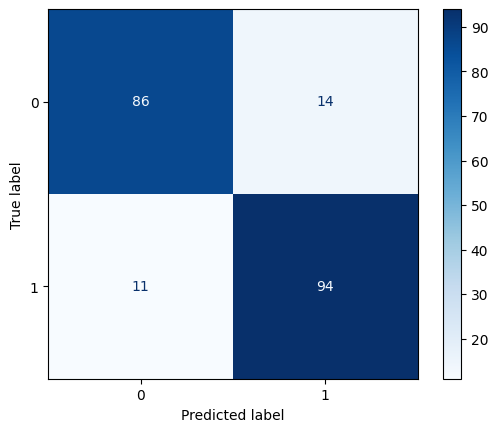

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Как видно из результатов обучения логистической регрессии: возраст, уровень сахара в крови и холестерин не так важны для предсказания наличия заболевания у человека (Это связано с тем, что уровень сахара в крови - это категориальный признак в нашем случае и возможно модель не придает этому большого значения)

Я посчитал следующие метрики: точность, FP, FN, TP, TN, f1_score, recall и precision

## Решающий лес

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=10)

In [51]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20)

In [52]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.9804878048780488


In [53]:
from sklearn.metrics import f1_score, recall_score, precision_score

f1 = f1_score(y_test, y_pred)

rec = recall_score(y_test, y_pred)

prec = precision_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {rec}")
print(f"Precision: {prec}")

F1 Score: 0.9813084112149533
Recall: 1.0
Precision: 0.963302752293578


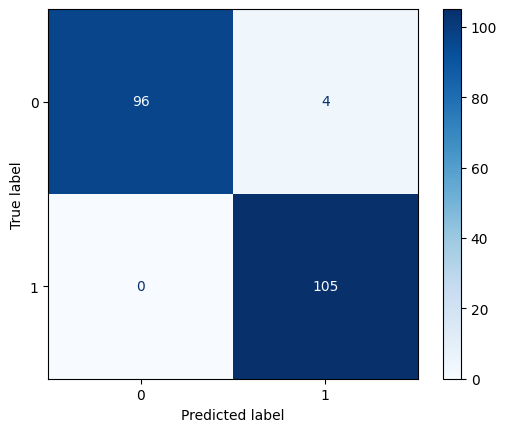

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Как видно решающий лес оказался невероятно сильным в этой задачей: мы ниразу не ошиблись в предсказании больных людей (в том смысле, что все больные были обнаружены), но, к сожалению, предсказали сердечное заболевание для 4-ех здоровых людей